In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score

In [2]:
df=pd.read_csv('voice-classification.csv')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Preprocessing

In [4]:
df.isnull().sum() #no null values found

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
df.info() #only one categorical feature that is label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [6]:
df.var()#varience before scaling

meanfreq        0.000895
sd              0.000277
median          0.001322
Q25             0.002370
Q75             0.000559
IQR             0.001830
skew           17.982084
kurt        18205.743623
sp.ent          0.002023
sfm             0.031514
mode            0.005960
centroid        0.000895
meanfun         0.001044
minfun          0.000369
maxfun          0.000905
meandom         0.275840
mindom          0.004007
maxdom         12.398544
dfrange        12.390675
modindx         0.014269
dtype: float64

In [7]:
#converting label that is male and female into 1 and 0
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [8]:
# selecting features to be scaled because of the large varience values and label is left untouched
features=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

In [9]:
#scaling all the columns in features list
s=MinMaxScaler()
dfs=s.fit_transform(df[features])
dfs=pd.DataFrame(dfs,columns=features)
dfs['label']=df['label']

In [10]:
dfs.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1


In [11]:
dfs.var() # varience after scaling

meanfreq    0.019960
sd          0.029526
median      0.021111
Q25         0.038805
Q75         0.010516
IQR         0.032404
skew        0.015035
kurt        0.010649
sp.ent      0.034165
sfm         0.048503
mode        0.076024
centroid    0.019960
meanfun     0.031481
minfun      0.009784
maxfun      0.029198
meandom     0.031699
mindom      0.019431
maxdom      0.025947
dfrange     0.025968
modindx     0.016414
label       0.250079
dtype: float64

## Train test split and PCA 

In [12]:
X=dfs[features]
y=dfs['label']


In [13]:
#splitting train and test data in 80 and 20
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.2,random_state=4)

In [14]:
trainX.shape

(2534, 20)

In [75]:
#applying feature selection
pca=PCA(0.95)
trainX=pca.fit_transform(trainX)
testX=pca.transform(testX)

In [76]:
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.54893818 0.13076269 0.09353882 0.06636937 0.05753046 0.04232964
 0.03326399]


In [77]:
trainX.shape

(2534, 7)

## Logistic regg

In [78]:
lor=LogisticRegression()
#model1=AdaBoostClassifier(n_estimators=19)
model_logreg=lor.fit(trainX,trainy)
preds_logreg=model_logreg.predict(testX)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
model_logreg.score(testX,testy)

0.9542586750788643

In [80]:
t_logreg=confusion_matrix(testy,preds_logreg)
print(t_logreg)

[[297  17]
 [ 12 308]]


## KNN

In [81]:
model_knn=KNeighborsClassifier(n_neighbors=2,metric="euclidean")
model_knn.fit(trainX,trainy)
preds_knn=model_knn.predict(testX)

In [82]:
model_knn.score(testX,testy)

0.9716088328075709

In [83]:
t_knn=confusion_matrix(testy,preds_knn)
print(t_knn)

[[311   3]
 [ 15 305]]


## Decision Tree

In [84]:
dt = DecisionTreeClassifier()
#model1=AdaBoostClassifier(n_estimators=19)
model_dt=dt.fit(trainX,trainy)
preds_dt=model_dt.predict(testX)

In [85]:
model_dt.score(testX,testy)

0.9400630914826499

In [86]:
t_dt=confusion_matrix(testy,preds_dt)
print(t_dt)

[[293  21]
 [ 17 303]]


## SVC

In [87]:
svm=SVC()
model_svc=svm.fit(trainX,trainy)
model_svc.score(testX,testy)
preds_svc=model_svc.predict(testX)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [88]:
t_svc=confusion_matrix(testy,preds_svc)
print(t_svc)

[[301  13]
 [ 10 310]]


In [89]:
from sklearn.model_selection import KFold,cross_val_score

In [90]:
kfold=KFold(n_splits=5)

In [91]:
result=cross_val_score(model_svc,trainX,trainy,cv=kfold)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 

In [92]:
print(result.mean())

0.9609350515705032


In [93]:
result

array([0.96055227, 0.96252465, 0.95857988, 0.95266272, 0.97035573])

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
model_rf=RandomForestClassifier(n_estimators=10)
model_rf.fit(trainX,trainy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
model_rf.score(trainX,trainy)

0.9980268350434096

In [97]:
model_rf.score(testX,testy)

0.973186119873817

In [98]:
model_rf.feature_importances_

array([0.31968784, 0.14382424, 0.06544423, 0.06532762, 0.22632101,
       0.13240511, 0.04698995])

In [99]:
result_svc=cross_val_score(model_svc,testX,testy,cv=5)
result_logreg=cross_val_score(model_logreg,testX,testy,cv=5)
result_knn=cross_val_score(model_knn,testX,testy,cv=5)
result_dt=cross_val_score(model_dt,testX,testy,cv=5)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 

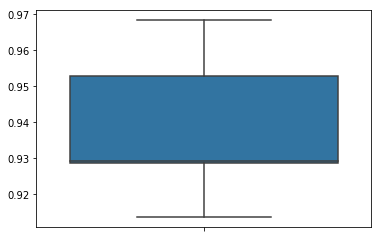

In [100]:
sns.boxplot(result_svc,orient='v')

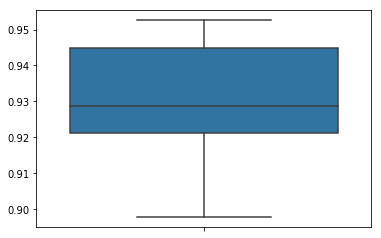

In [101]:
sns.boxplot(result_logreg,orient='v')

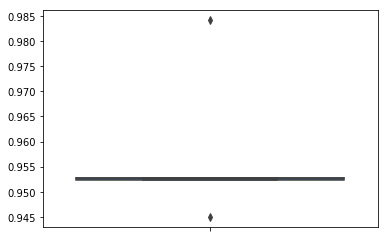

In [102]:
sns.boxplot(result_knn,orient='v')

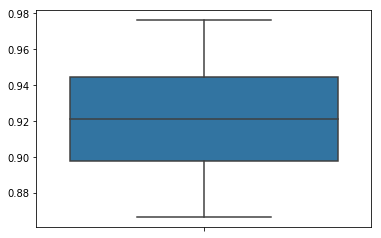

In [103]:
sns.boxplot(result_dt,orient='v')

In [104]:
print(result_knn.mean())

0.9574053243344581


In [105]:
print(result_svc.mean())
print(result_dt.mean())
print(result_logreg.mean())

0.9384701912260967
0.921172353455818
0.9290213723284589


In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(preds_knn,testy))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       326
           1       0.95      0.99      0.97       308

   micro avg       0.97      0.97      0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [108]:
df_score = pd.DataFrame(data=[result_svc,result_knn,result_dt,result_logreg], index=['svc','knn','dt','log'], columns=['s1','s2','s3','s4','s5'])

In [109]:
df_score=df_score.T
df_score

,svc,knn,dt,log
s1,0.913386,0.944882,0.866142,0.897638
s2,0.929134,0.952756,0.976378,0.921260
s3,0.952756,0.952756,0.921260,0.944882
s4,0.968504,0.984252,0.897638,0.952756
s5,0.928571,0.952381,0.944444,0.928571


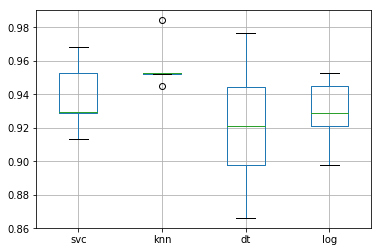

In [110]:
df_score.boxplot()